테스트할 그림파일 경로를 입력해 주세요.mnist_fashion_test.jpg


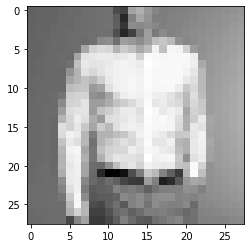

CNN 추론결과 : 가방 (p : 1.0)


In [10]:
import cv2
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

model_dir = "models/mnist_cnn"

#얼굴판별 CNN 모델 로드
model_pgu = tf.keras.models.model_from_json(open(model_dir + "/pgu_mnist_fashion_model_cnn_json.json").read())
model_pgu.load_weights(model_dir + "/pgu_mnist_fashion_model_cnn_weights.h5")
class_names_file = model_dir + "/pgu_mnist_fashion_model_cnn_names.json"
with open(class_names_file, "r") as json_file:
    class_names = json.load(json_file)

def testImage():
    img_file = input("테스트할 그림파일 경로를 입력해 주세요.")
    img_file = "images/" + img_file
    src = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
    src_resized = cv2.resize(src, (28, 28), interpolation=cv2.INTER_AREA)
    src_resized_for_predict = np.expand_dims(src_resized, axis=0)
    src_resized_for_predict = src_resized_for_predict.reshape(src_resized_for_predict.shape[0], src_resized_for_predict.shape[1], src_resized_for_predict.shape[2], 1)
    predicted_vector = model_pgu.predict(src_resized_for_predict)
    predicted_class = np.argmax(predicted_vector, axis=-1)
    class_no = str(predicted_class).replace("[", "").replace("]", "")
    label = class_names[class_no] + " (p : " + str(round(max(predicted_vector[0]), 2)) + ")"
    plt.imshow(src_resized, cmap="gray")
    plt.show()
    print("CNN 추론결과 : {}".format(label))
        
if __name__ == "__main__":
    testImage()

In [7]:
dataset = tf.keras.datasets.mnist.load_data()
print(dataset[0][0][0].shape)

(28, 28)
